>Below is a copied and translated version of seaborn tutorial (v0.12.2) from the seaborn official docs.
>
>해당 내용은 seaborn 공식 문서에서 제공하는 seaborn 튜토리얼(v0.12.2)의 단순 필사 및 번역본입니다.  
>     
> © Copyright 2012-2022, Michael Waskom. (https://seaborn.pydata.org/tutorial/introduction.html)

`User guide and tutorial`

## seaborn 입문 
An introduction to seaborn

Seaborn은 Python에서 통계적 시각화를 가능하게 해주는 라이브러입니다. matplolib을 기반으로 만들어졌고 pandas 데이터 구조와 긴밀하게 융합됩되어서 데이터를 탐색하고 이해하는데 도움을 줍니다.  

seaborn의 플로팅 기능(함수, function)은 데이터프레임과 전체 데이터셋을 포함하는 배열에서 작동합니다. 내부적으로 필요한 의미를 맵핑(semantic mapping)하고 통계 집계를 과정을 거쳐 정보성 시각자료(informative plots)를 생성하게 됩니다. 데이터셋 지향적이며 선언적(declarative) API 덕분에 사용자는 그래프를 그리는 방법에 대한 디테일보다 플롯 내의 각 요소들의 의미에 집중할 수 있습니다.  

아래는 seaborn을 통해 만들어볼 수 있는 예제입니다 :

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
146,18.64,1.36,Female,No,Thur,Lunch,3
65,20.08,3.15,Male,No,Sat,Dinner,3


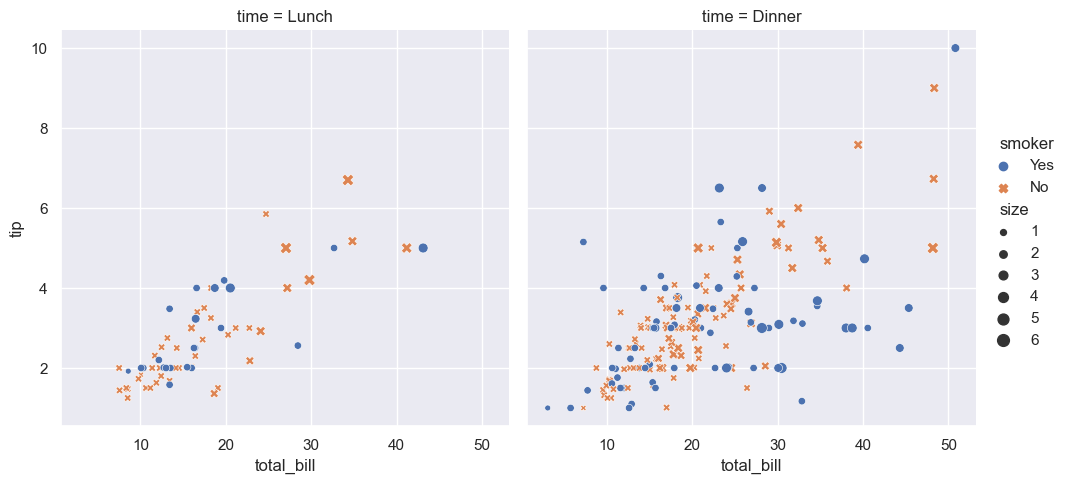

In [3]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset('tips')
display(tips.sample(3))

# Create a visualization
sns.relplot(
    data=tips,
    x='total_bill', y='tip', col='time',
    hue='smoker', style='smoker', size='size'
);

In [5]:
# seaborn 라이브러리 로드
import seaborn as sns

이 예제는 다른 라이브러리 없이 seaborn만으로 만들어볼 수 있습니다. 
seaborn은 보통 로드할 때 약어(alias, shorthand)로 sns 라고 지정해줍니다.  
뒷단에서 seaborn은 plot을 그리기 위해 matplotlib을 사용합니다. interactive한 작업을 위해, Jupyter/Ipython 환경에서 matplotlib 모드를 사용하는 것을 권장합니다. 그 외의 환경에서는 plot을 보기 위해서는 `matplotlib.pyplot.show()` 를 시행해줘야 할 수 있습니다.

In [6]:
# 기본 theme 설정
sns.set_theme()

여기서는 matplotlib의 rcParam 시스템을 사용해서 seaborn에서 별도의 설정 없이 모든 matplotlib plot에서 보이는 스타일에 영향을 줍니다. 기본테마(default theme) 외에도 플롯 스타일, 스케일 등의 옵션들을 독립적으로 설정해서 presentation contexts를 손쉽게 반영할 수 있습니다. 만약 기본 matplotlib 설정이나 다른 테마를 원한다면 이 과정을 건너뛰고 seaborn 에서 plotting function을 사용하면 됩니다.

In [7]:
# 예제 데이터셋 로드 (seaborn라이브러리 기본 내장)
tips = sns.load_dataset("tips")

이 문서에서의 대부분 코드는 예제 데이터셋을 빠르게 가져오기 위해 load_dataset() 함수를 이용할 것입니다. 예제 데이터셋은 `pandas.read_csv()`를 이용하거나 직접 만들 수도 있는 일반적인 pandas 데이터프레임 입니다. 대부분의 예제에서 pandas dataframe 형태의 데이터를 다룰 예정이지만, 사실 seaborn은 다양한 데이터 구조를 사용할 수 있습니다.

In [ ]:
# 시각화
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
);

이 플롯은 한번의 seaborn함수(replot()) 호출로 tips 데이터셋의 5개 변수 간의 관계를 보여줍니다. 여기서 우리는 단순히 변수의 이름과 역할만 지정해줬습니다. matplotlib을 직접 사용할 때와 달리 색상값이나 마커코드 관련 플롯 요소의 속성(attributes)을 직접 지정해줄 필요가 없습니다. 뒷단에서 seaborn은 데이터 프레임의 값을 matplotlib이 이해할 수 있는 인수(argument)로 알아서 변환해준 것입니다. 이 선언적 방법(declarative approach) 덕분에 사용자는 matplotlib 제어 관련 세부 디테일이 아닌 보여주고 싶은 내용에 집중할 수 있습니다.  
<br></br>

## 통계 그래픽을위한 고급 API
A high-level API for statistical graphics

데이터를 시각화할 때 모든 상황에서 통용되는 항상 옳은 답이라는 것은 없습니다. 각기 다른 문제상황은 그에 적합한 플롯으로 설명되어야 합니다. seaborn은 일관적인 데이터셋-지향 API를 통해 손쉽게 여러 시각적 표현방법으로 전환할 수 있습니다. 

relplot() 함수명은 이 함수가 여러 통계적 관계(**rel**ationship)를 시각화하도록 설계되었기 때문에 relplot 이라고 명명된 것입니다. 경우에 따라서 scatter plot 이 효과적일 떄도 있지만, 하나의 변수가 시간값을 나타낼 때는 보통 line plot 으로 더 잘 표햔됩니다. relplot() 함수는 변수(kind) 설정을 통해 이런 표현방법들을 쉽게 바꿔서 그려볼 수 있습니다.

    kind : string
        Kind of plot to draw, corresponding to a seaborn relational plot.
        Options are `"scatter"` or `"line"`.

,align,choice,time,coherence,firing_rate
788,sacc,T2,120,0.0,28.384913
736,sacc,T2,-60,6.4,38.496075
644,sacc,T2,-420,6.4,41.561002


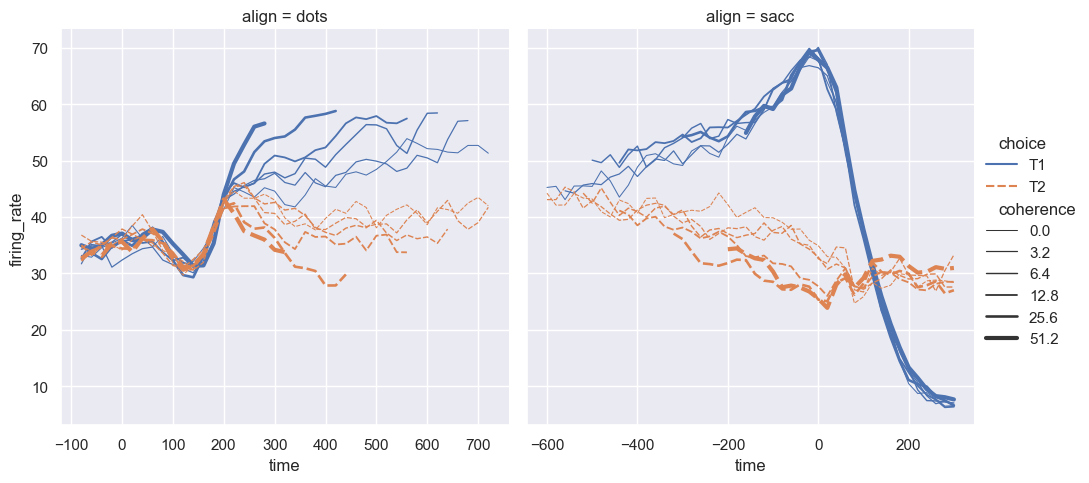

In [23]:
dots = sns.load_dataset('dots')
display(dots.sample(3))
sns.relplot(
    data=dots, kind='line',
    x='time', y='firing_rate', col='align',
    hue='choice', size='coherence', style='choice',
    facet_kws=dict(sharex=False),
);

Notice how the size and style parameters are used in both the scatter and line plots, but they affect the two visualizations differently: changing the marker area and symbol in the scatter plot vs the line width and dashing in the line plot. We did not need to keep those details in mind, letting us focus on the overall structure of the plot and the information we want it to convey.

size와 style 파라미터는 scatterplot과 lineplot 에서 모두 사용되지만, 두 시각화에 다르게 영향을 미칩니다 (scatterplot: 마커크기와 모양, lineplot: 라인 두께와 점선). 두 플롯을 그릴 때, 이런 디테일을 기억할 필요 없이 전체적인 플롯 구조와 보여주고 싶은 정보에만 집중하면 됐습니다.

<br></br>
### 통계 추정
Statistical estimation

Often, we are interested in the average value of one variable as a function of other variables. Many seaborn functions will automatically perform the statistical estimation that is necessary to answer these questions:
종종 (다른 변수들에 대한 연산으로 구해진) 평균을 나타내는 값이 보고 싶은 경우가 있습니다. seaborn 함수는 이런 경우에 필요한 통계 추정을 자동으로 수행합니다 :

,subject,timepoint,event,region,signal
1061,s12,7,cue,frontal,-0.004939
1004,s11,8,cue,frontal,-0.044925
1027,s2,9,cue,frontal,-0.037689


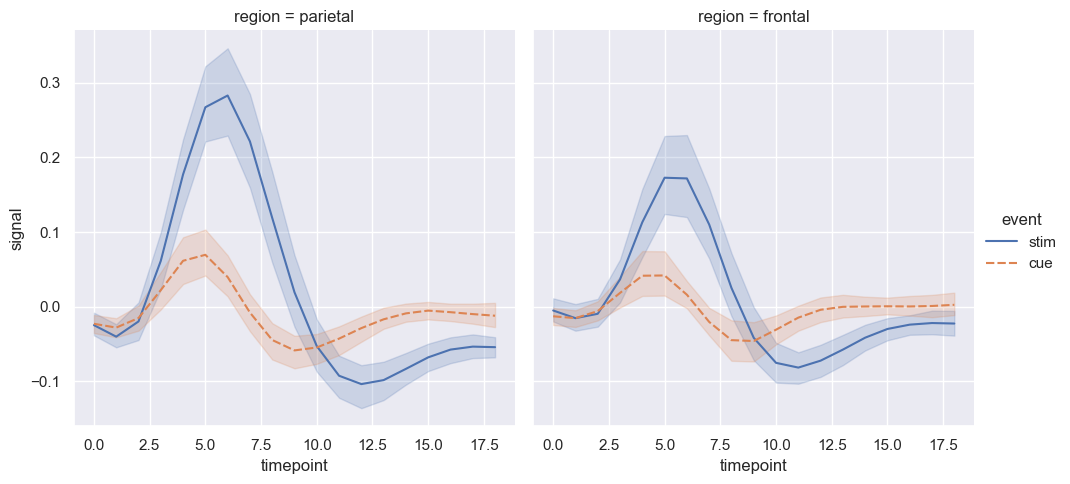

In [26]:
fmri = sns.load_dataset('fmri')
display(fmri.sample(3))
sns.relplot(
    data=fmri, kind='line',
    x='timepoint', y='signal', col='region',
    hue='event', style='event',
);

통계값이 추정되면, seaborn은 부트스트래핑(bootstrapping)을 통해 신뢰구간(confidence interval)을 계산하고 추정치의 불확실성을 나타내는 에러바(error bar)를 그립니다. 

seaborn 에서의 통계적 추정 기능은 단순 기술통계(descriptive stastics) 이상입니다. 예를 들어, scatterplot에 lmplot()을 사용하여 선형 회귀 모델(linear regression model)과 불확실성을 추가할 수도 있습니다.  

<p></p><br>
* <span style='color:gray'> 부트스트랩(bootstrapping) : 단일 랜덤 표본에서 복원으로 여러 표본을 가져와서 표본 추출 분포를 추정하는 방법
(https://support.minitab.com/ko-kr/minitab/20/help-and-how-to/probability-distributions-random-data-and-resampling-analyses/supporting-topics/resampling-analyses/what-is-bootstrapping/)

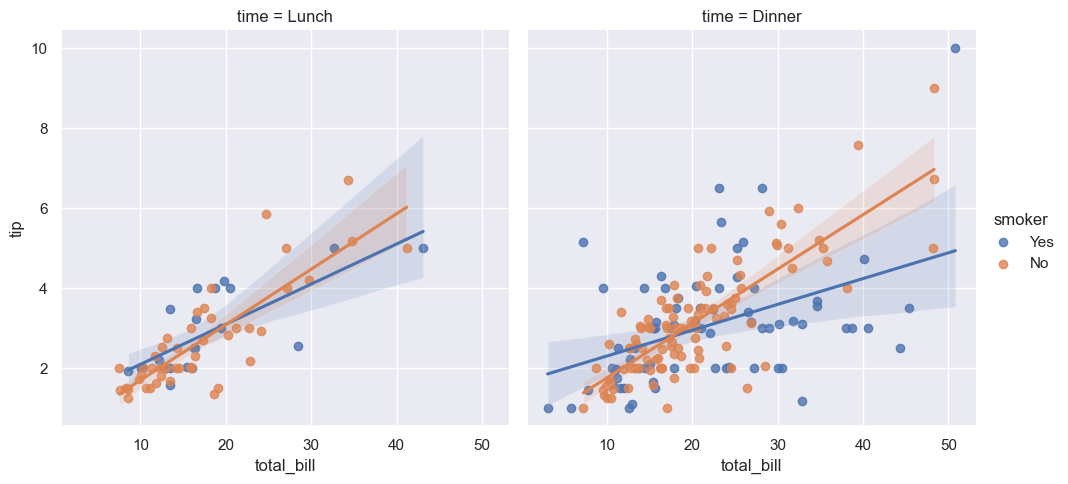

In [17]:
sns.lmplot(data=tips, x='total_bill', y='tip', col='time', hue='smoker');

### 분포 표현
Distributional representations

통계 분석은 데이터 셋의 변수 분포에 대한 지식을 필요로합니다. seaborn의 displot() 함수는 분포(distribution)을 시각화하는 여러 접근법을 제공합니다. 여기서 말하는 접근법에는 클래식한 테크닉(히스토그램: histogram)과 계산집약적(커널 밀도 추정: kernel density estimation) 방법들이 포함됩니다.

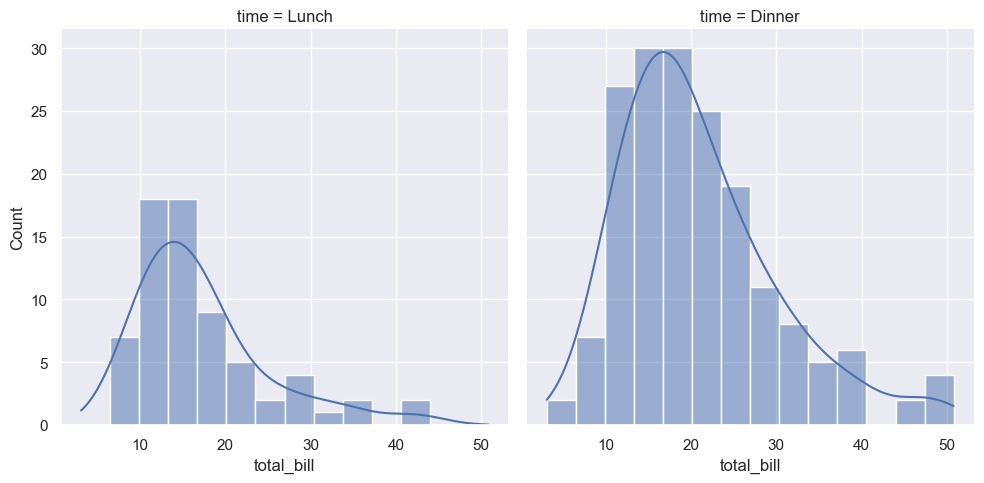

In [33]:
sns.displot(data=tips, x="total_bill", col="time", kde=True);

seaborn은 그 외에도 강력하지만 아직 친숙하지 않은 테크닉들도 지원하고 있습니다. (ex. 경험적 누적 분포 함수 : empirical cumulative distribution)

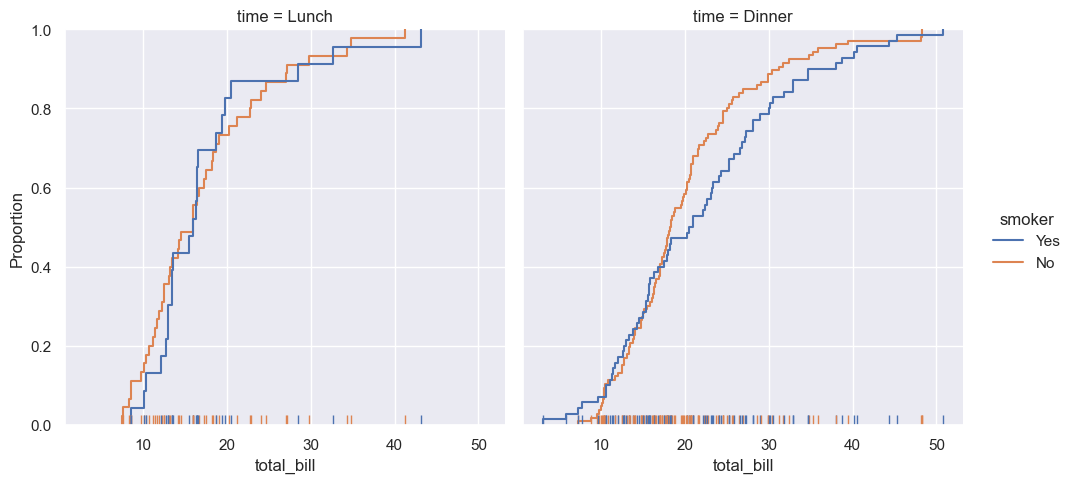

In [37]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True);

### 범주 형 데이터를위한 도표

seaborn의 몇몇 플롯 타입은 범주형 데이터(categorical data)를 표현하는데 특화되어 있습니다 `catplot()` <br>
catplot에 속하는 각 플롯 방법들은 다른 레벨의 세분성를 제공합니다. 가장 세분화된 수준을 제공하는 swarmplot(범주 축에 따라 점의 위치를 조정하여 겹치지 않게 하는 scatterplot)에서는 모든 개별 관측치를 표현할 수도 있습니다. 


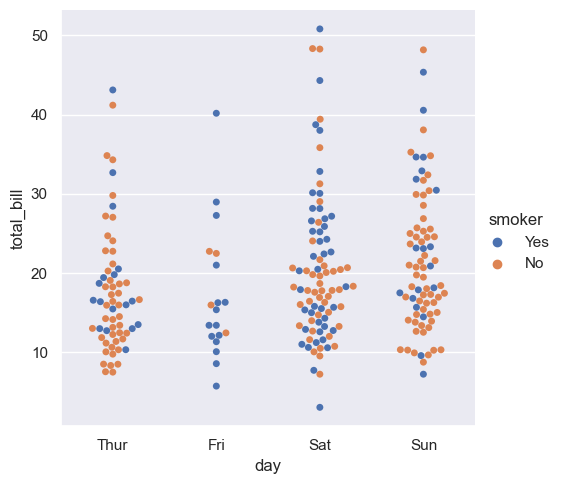

In [70]:
sns.catplot(data=tips, kind='swarm', x='day', y='total_bill', hue='smoker');
# hue  => color와도 비슷한 단어. hue='smoker'로 지정해주면 smoker 값에 따라 색이 다르게 찍힘.

위의 방법 대신 '커널 밀도 추정(kernel density estimation)'으로 포인트가 샘플링되는 기본 분포를 나타낼 수도 있습니다 :

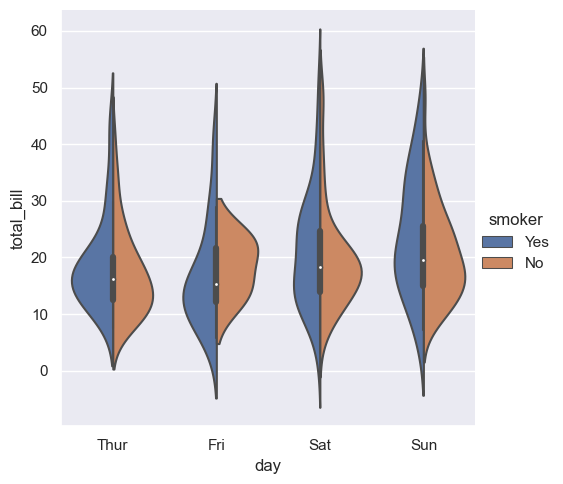

In [71]:
sns.catplot(data=tips, kind='violin', x='day', y='total_bill', hue='smoker', split=True);
# split = True  => smoker 'Yes'와 'No' 2개의 그래프를 반씩 쪼게서 하나의 형태로 만들어줌.

또는 집계된 카테고리별로 평균값과 신뢰구간만 표시할 수도 있습니다 :

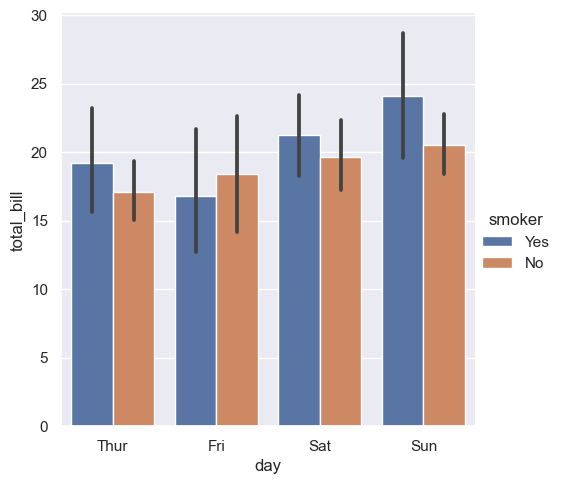

In [72]:
sns.catplot(data=tips, kind='bar', x='day', y='total_bill', hue='smoker');
# errorbar=('ci', 95) => 95% 신뢰구간을 표시한다. 
# but, 부트스트래핑으로 처리시간이 오래 걸리므로 errorbar=None으로 해주는 것이 좋다.

## 여러 변수(multivariate)에 대해 시각화
Multivariate views on complex datasets

Some seaborn functions combine multiple kinds of plots to quickly give informative summaries of a dataset. One, jointplot(), focuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution:

seaborn 함수들은 데이터셋에 대한 요약정보를 신속하게 전달하기 위해서 다른 종류의 플롯들을 합쳐주기도 합니다.
먼저,`joinplot()`은 각 변수의 한계분포(marginal distribution)와 두 변수간의 공통분포(joint distribution)를 함께 시각화해서 관계성에 집중하도록 해줍니다.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


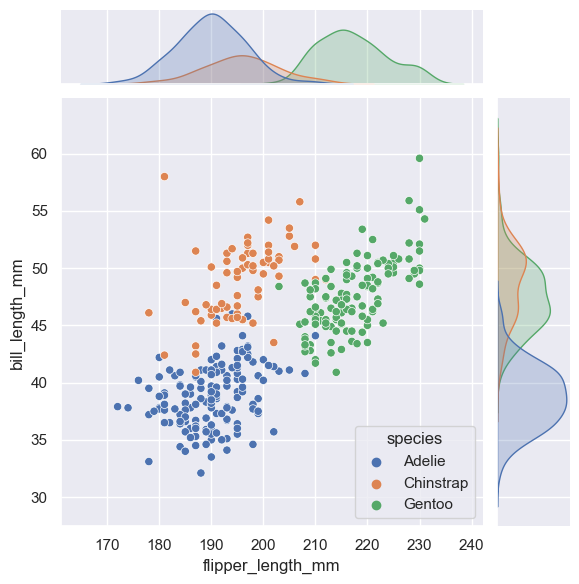

In [15]:
penguins = sns.load_dataset('penguins')
display(penguins.head(2))
sns.jointplot(data=penguins, 
              x='flipper_length_mm', y='bill_length_mm',
              hue='species', );

다음으로, `pairplot()`은 각 변수들을 짝지었을 때의 모든 한계분포와 공통분포를 표시해서 더 넓은 시각으로 데이터를 표현해줍니다.

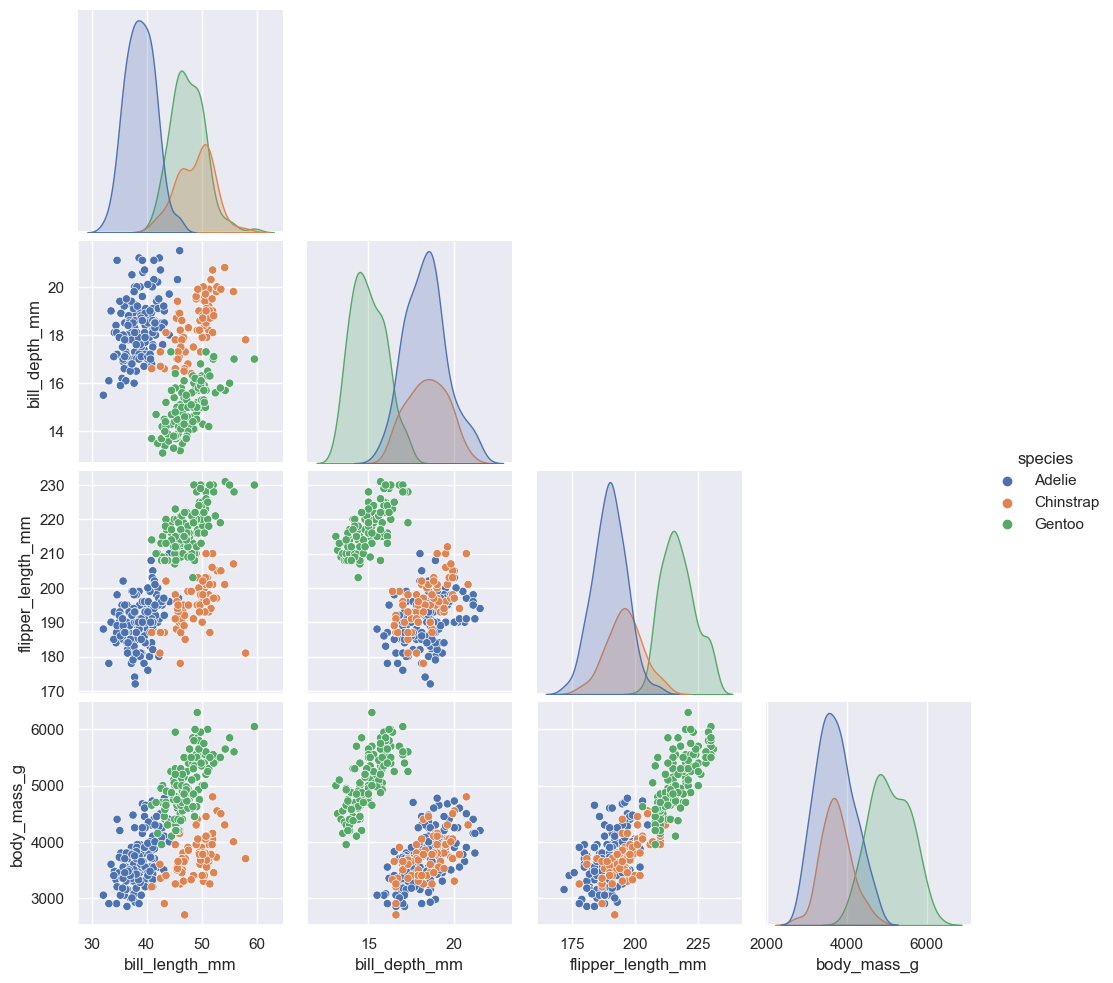

In [24]:
sns.pairplot(penguins, hue='species', corner=True);

### figure를 만들어주는  lower-level 툴
Lower-level tools for building figures

이 lower-level 툴들은 axes-level 플로팅 함수와 그림의 레이아웃을 제어하는 객체를 결합하고, 데이터셋 구조를 축 그리드에 연결함으로써 작동합니다. 두 요소 모두 공용 API이므로, 코드 몇 줄에 불러오기만 해도 원하는 그림을 만들어낼 수 있습니다.

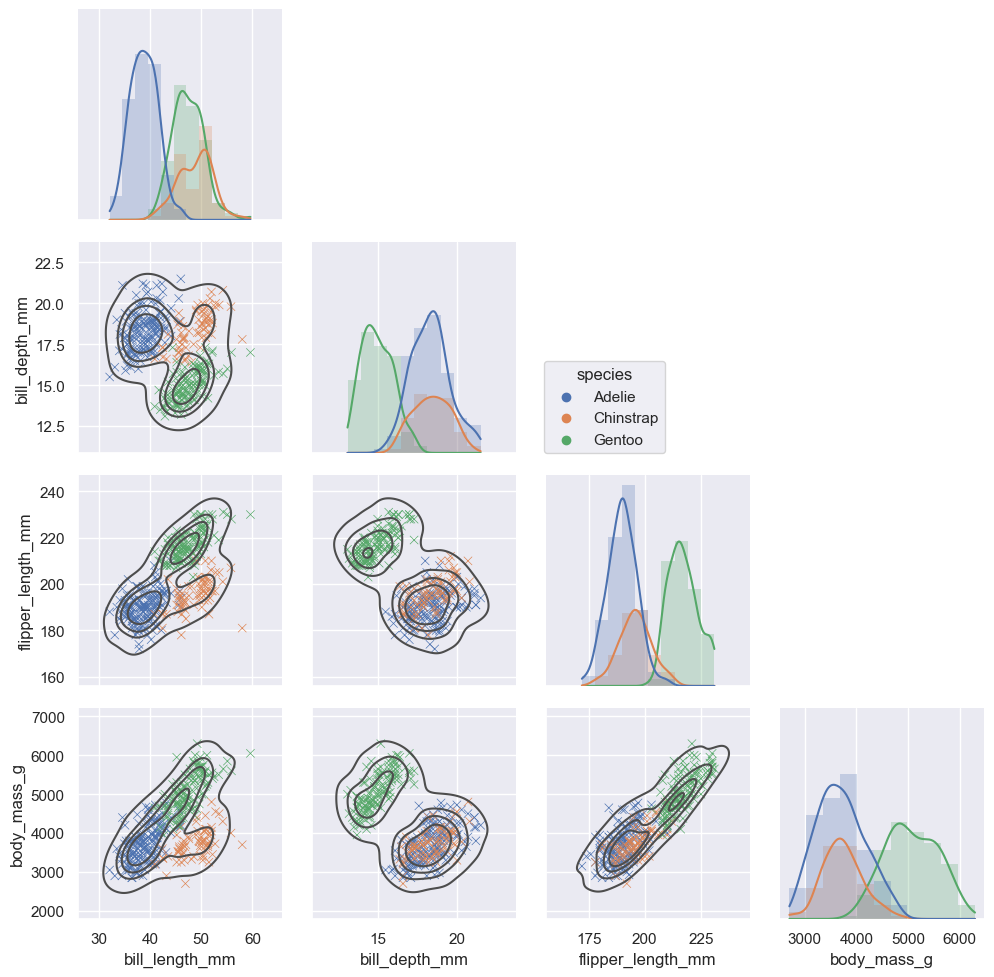

In [77]:
g = sns.PairGrid(penguins, hue='species', corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color='.3')
g.map_lower(sns.scatterplot, marker='x')
g.map_diag(sns.histplot, element='step', linewidth=0, kde=True)  # diagnal 대각선
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.6, .57))

# sns.PairGrid 대문자인 것을 보니까 class인 것 같다.
# g.map_lower, g.map_diag, ... => PairGrid 클래스의 함수들.
# 처음에 클래스 생성할 때 (data, hue, corner)를 받았으니까 밑에 서는 그대로 상속됨.

## 기본값과 커스터마이징
Opinionated defaults and flexible customization

seaborn은 한번의 함수 호출만으로 완전한 그래픽을 만들어냅니다. 함수에서는 가능하다면 자동으로 정보 축 레이블과 맴핑의 의미를 설명하는 범례(legend)를 추가합니다.

그리고 대부분의 경우 데이터의 특성에 따라 매개변수(parameter)에 대한 기본값(default values)도 자동으로 선택합니다. 예를 들어, 지금까지 위에서 본 플롯의 컬러맵핑은 hue에 할당된(assigned) 범주형 변수들의 다른 레벨을 표현하기 위해 각기 다른 hue값(blue, orange, green)을 사용했습니다.

수치형 변수를 맵핑할 때 일부 함수는 연속성을 표현하는 그라데이션으로 바뀌기도 합니다.

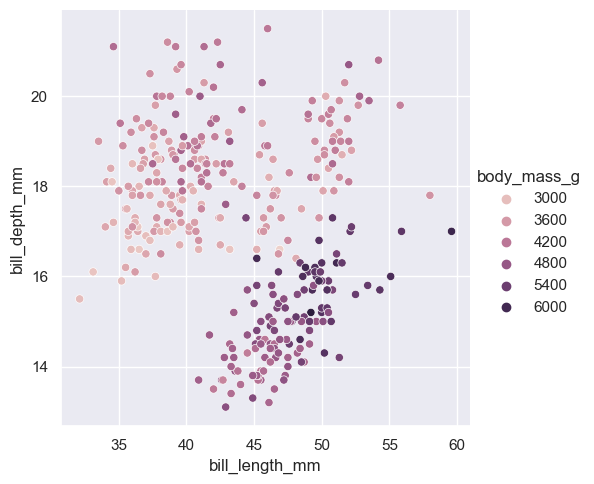

In [82]:
sns.relplot(data=penguins,
            x='bill_length_mm', y='bill_depth_mm', hue='body_mass_g'
           );

작업물을 외부에 공유하거나 퍼블리싱할 경우에는 아마 그래프 기본값을 사용하기 보다는 좀 더 다듬고 싶을 수도 있습니다.
seaborn에는 이런 경우 사용가능한 몇 단계의 커스터마이징을 제공합니다. 
먼저, 모든 그림(figure)에 한꺼번에 적용할 수 있는 기본테마(built-in-theme)가 제공됩니다. 모든 함수는 각각의 플롯을 수정할 수 있는 표준화된 매개변수(parameter)를 가지고 있고, 키워드 아규먼트(keyword argument)를 matplotlib artisst에 전달해서 추가적인 제어도 가능합니다. 플롯을 생성하고 난 후에는 seaborn API로 플롯의 속성을 변경할 수도, 혹은 세부적인 부분은 matplotlib layer로 내려가서도 변경할 수 있습니다. 

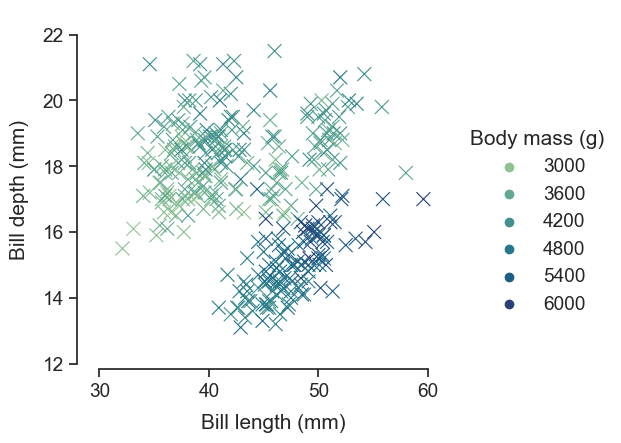

In [128]:
sns.set_theme(style='ticks', font_scale=1.25)
g = sns.relplot(data=penguins,
                x='bill_length_mm', y='bill_depth_mm', hue='body_mass_g',
                palette='crest', marker='x', s=100)
g.set_axis_labels('Bill length (mm)', 'Bill depth (mm)', labelpad=10)
g.legend.set_title('Body mass (g)')
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)  # 전체 배율?
g.despine(trim=True);  # 축 자름

### matplotlib과의 관계
Relationship to matplotlib

seaborn은 통합성 덕분에 matplotlib에서 제공하는 많은 환경(notebooks에서의 탐색적 분선, GUI 어플리케이션의 실시간 상호작용, 다양한 raster나 벡터 형식의 archival output 등)에서도 사용이 가능합니다.  

seaborn의 기능만을 사용해도 생산성이 있지만, 그래픽을 완전히 커스터마이징 하려면 matplotlib의 개념과 API을 이해해야 합니다. seaborn을 처음 접하는 사용자라면 특정 커스터마이징을 위해 matplotlib 레이어로 내려가는 것을 배우는 단가 러닝커브(learning curve)가 될 것입니다. 반대로 기존에 matplotlib에서 seaborn으로 넘어온 유저들은 여기서도 기존 지식을 잘 활용할 수 있을겁니다.

matplotlib은 그래프의 어떤 속성이든 원하는 것으로 바꿀 수 있는 넓고 강력한 API를 가지고 있습니다. seaborn의 high-level 인터페이스와 matplotlib의 심층적인 커스터마이징 기능을 함께 사용하면, 데이터를 빠르게 탐색하면서도 퍼블리싱할 정도의 퀄리티로 그래픽을 생성할 수 있을 것입니다.

### 다음 단계
Next steps

seaborn을 설치했다면 다음으로는 example gallery 에서 seaborn으로 어떤 종류의 그래픽을 만들어낼 수 있는지 살펴보세요. 혹은 이어지는 튜토리얼을 통해 여러 툴들이 어떻게 디자인되었고 작동하는지에 대한 심층적인 정보를 얻을 수도 있습니다.
만약 그려보고 싶은 특정 플롯이 있다면 각 함수의 매개변수(parameter)에 대한 설명과 예제를 포함한 API reference를 참고해보세요.